In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df=pd.read_excel(r"C:\Users\Administrator\Desktop\KeertiC\dapcopz1_x.xlsx")
df

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,-0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51168,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51171,1023.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

In [8]:
df.columns.tolist()

['FLTM',
 'DAPC1',
 'DAPC2',
 'DAPC3',
 'DAPC4',
 'DAPC5',
 'DAPC6',
 'DAPC7',
 'DAPC8']

In [9]:
c=[]
for i in range(1,51172):
    if ( df.iloc[i]['FLTM']>=df.iloc[i+1]['FLTM']):
        c.append(i)

In [10]:
print(c)



[]


In [11]:
df=df.drop_duplicates(subset=['FLTM'],keep='first')


In [12]:
df

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,-0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51168,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51171,1023.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df=df.reset_index().set_index('FLTM')


In [14]:
df


,index,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
FLTM,,,,,,,,,
-0.02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.02,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.04,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.06,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1023.34,51168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023.36,51169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023.38,51170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
s=0.02
a=np.arange(df.index.min(),df.index.max() + s,step=s)
df=df.reindex(a,tolerance=0.01,method='nearest')

In [16]:
cols=df.columns.difference(['index'])


In [17]:
df[cols]=df[cols].fillna(method='ffill')

In [18]:
s=pd.Series(np.arange(len(df.index)),index=df.index)

In [19]:
df['index']=df['index'].combine_first(s)

In [20]:
df=df.reset_index().set_index('index')

In [21]:
df

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
index,,,,,,,,,
0,-0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51168,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df=df.drop(df.index[[0]])
df

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
index,,,,,,,,,
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51168,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

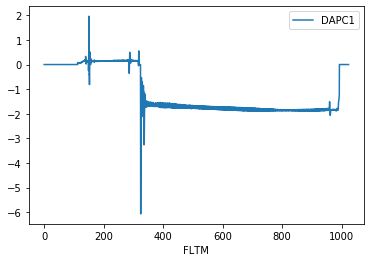

In [24]:
df.plot(x='FLTM',y='DAPC1')

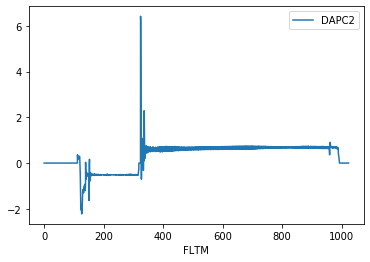

In [64]:
df.plot(x='FLTM',y='DAPC2')

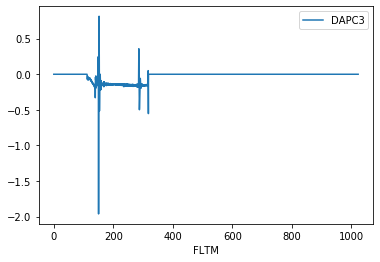

In [65]:
df.plot(x='FLTM',y='DAPC3')

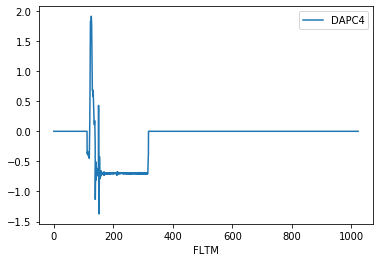

In [66]:
df.plot(x='FLTM',y='DAPC4')

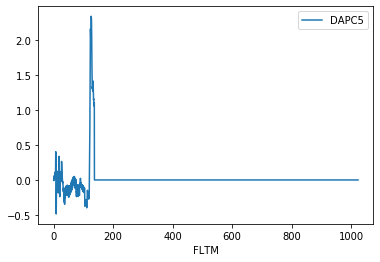

In [67]:
df.plot(x='FLTM',y='DAPC5')

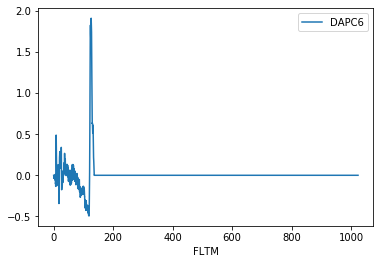

In [68]:
df.plot(x='FLTM',y='DAPC6')

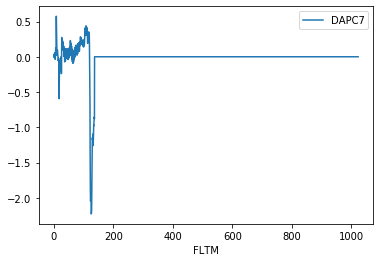

In [69]:
df.plot(x='FLTM',y='DAPC7')

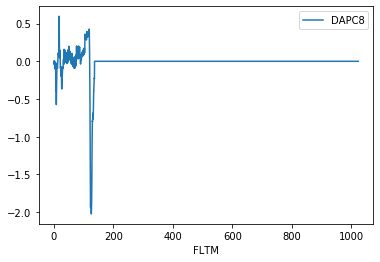

In [70]:
df.plot(x='FLTM',y='DAPC8')

In [45]:
df1=pd.read_excel(r"C:\Users\Administrator\Desktop\KeertiC\forSpikeRemoval\dapcorz1_x.xlsx")
df1

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51167,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51168,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df1.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

In [47]:
df1.columns.tolist()

['FLTM',
 'DAPC1',
 'DAPC2',
 'DAPC3',
 'DAPC4',
 'DAPC5',
 'DAPC6',
 'DAPC7',
 'DAPC8']

In [48]:
c=[]
for i in range(1,51171):
    if ( df1.iloc[i]['FLTM']>=df1.iloc[i+1]['FLTM']):
        c.append(i)
c

[]

In [49]:
df1=df1.drop_duplicates(subset=['FLTM'],keep='first')
df1

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51167,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51168,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51170,1023.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df1.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

In [51]:
df1=df1.reset_index().set_index('FLTM')
df1

,index,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
FLTM,,,,,,,,,
0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.02,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.04,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.06,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.08,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1023.34,51167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023.36,51168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023.38,51169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
s=0.02
a=np.arange(df1.index.min(),df1.index.max() + s,step=s)
df1=df1.reindex(a,tolerance=0.01,method='nearest')

In [53]:
cols=df1.columns.difference(['index'])

In [54]:
df1[cols]=df1[cols].fillna(method='ffill')

In [55]:
s=pd.Series(np.arange(len(df1.index)),index=df1.index)

In [56]:
df1['index']=df1['index'].combine_first(s)

In [57]:
df1=df1.reset_index().set_index('index')

In [58]:
df1

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
index,,,,,,,,,
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
51167,1023.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51168,1023.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51169,1023.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


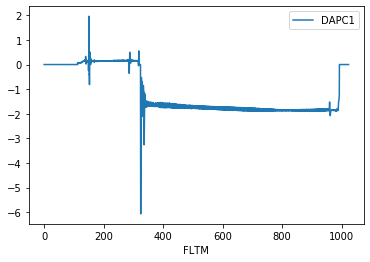

In [51]:
df1.plot(x='FLTM',y='DAPC1')

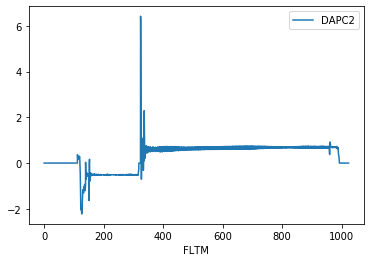

In [52]:
df1.plot(x='FLTM',y='DAPC2')

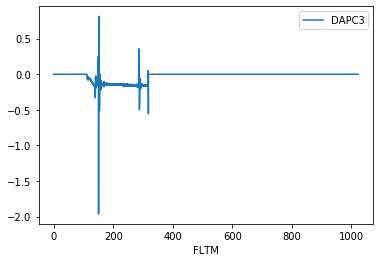

In [53]:
df1.plot(x='FLTM',y='DAPC3')

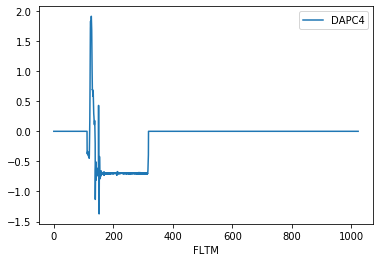

In [54]:
df1.plot(x='FLTM',y='DAPC4')

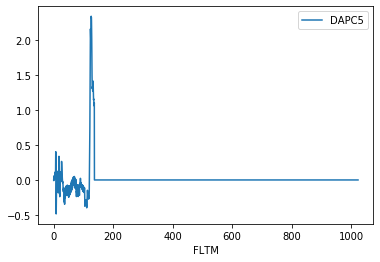

In [55]:
df1.plot(x='FLTM',y='DAPC5')

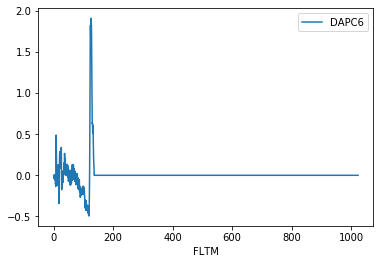

In [56]:
df1.plot(x='FLTM',y='DAPC6')

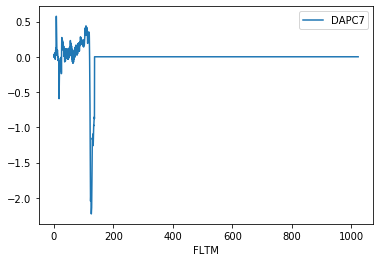

In [57]:
df1.plot(x='FLTM',y='DAPC7')

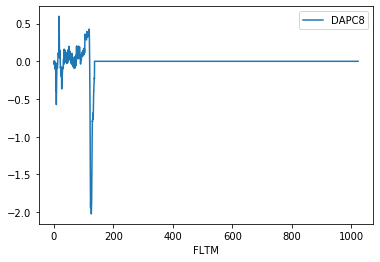

In [58]:
df1.plot(x='FLTM',y='DAPC8')

In [44]:
df_t=pd.read_excel(r"C:\Users\Administrator\Desktop\KeertiC\forTesting\dapcopz2_x.xlsx")
df_t

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.02,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.04,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.06,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94465,1890.86,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94466,1890.88,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94467,1890.90,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94468,1890.92,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [73]:
df_t.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

In [75]:
c=[]
for i in range(1,94469):
    if ( df_t.iloc[i]['FLTM']>=df_t.iloc[i+1]['FLTM']):
        c.append(i)
c

[18528]

In [76]:
df_t[18527:18530]

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
18527,370.72,-1.82373,0.00519,0.0,0.0,0.0,0.0,0.0,0.0
18528,370.80,-1.82373,0.01343,0.0,0.0,0.0,0.0,0.0,0.0
18529,370.80,-1.82373,0.01343,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
result_df=df_t.drop_duplicates(subset=['FLTM'],keep='first')
result_df[18527:18530]

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
18527,370.72,-1.82373,0.00519,0.0,0.0,0.0,0.0,0.0,0.0
18528,370.80,-1.82373,0.01343,0.0,0.0,0.0,0.0,0.0,0.0
18530,370.82,-1.82312,0.01617,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_t=result_df
df_t

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.02,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.04,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.06,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94465,1890.86,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94466,1890.88,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94467,1890.90,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94468,1890.92,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [80]:
df_t=df_t.reset_index().set_index('FLTM')
df_t

,index,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
FLTM,,,,,,,,,
0.00,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
0.02,1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
0.04,2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
0.06,3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
0.08,4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1890.86,94465,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1890.88,94466,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1890.90,94467,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [81]:
s=0.02
a=np.arange(df_t.index.min(),df_t.index.max() + s,step=s)
df_t=df_t.reindex(a,tolerance=0.01,method='nearest')

In [82]:
cols=df_t.columns.difference(['index'])


In [83]:
df_t[cols]=df_t[cols].fillna(method='ffill')

In [84]:
s=pd.Series(np.arange(len(df_t.index)),index=df_t.index)

In [85]:
df_t['index']=df_t['index'].combine_first(s)
df_t=df_t.reset_index().set_index('index')

In [86]:
df_t

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8
index,,,,,,,,,
0.0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1.0,0.02,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2.0,0.04,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3.0,0.06,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4.0,0.08,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94547.0,1890.94,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94548.0,1890.96,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
94549.0,1890.98,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [87]:
df_t.isnull().any()

FLTM     False
DAPC1    False
DAPC2    False
DAPC3    False
DAPC4    False
DAPC5    False
DAPC6    False
DAPC7    False
DAPC8    False
dtype: bool

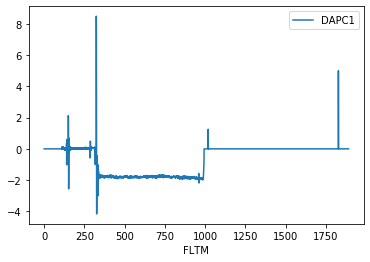

In [88]:
df_t.plot(x='FLTM',y='DAPC1')

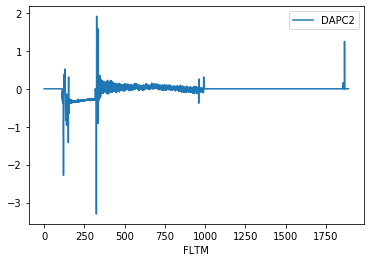

In [91]:
df_t.plot(x='FLTM',y='DAPC2')

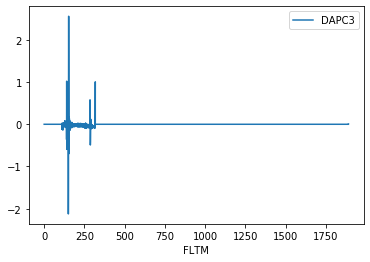

In [92]:
df_t.plot(x='FLTM',y='DAPC3')

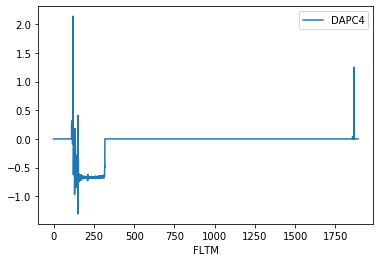

In [93]:
df_t.plot(x='FLTM',y='DAPC4')

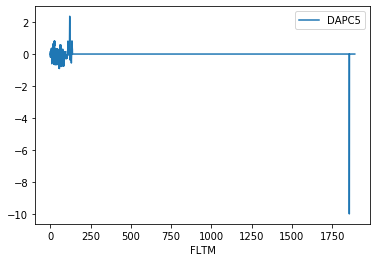

In [94]:
df_t.plot(x='FLTM',y='DAPC5')

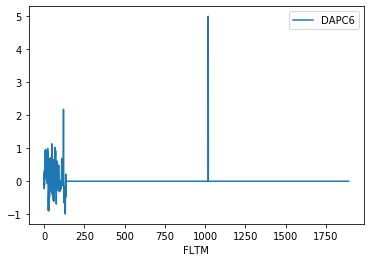

In [95]:
df_t.plot(x='FLTM',y='DAPC6')

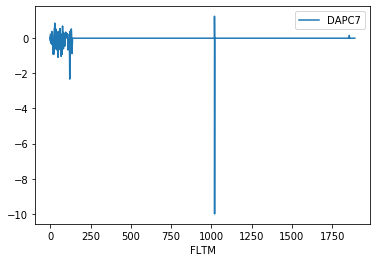

In [96]:
df_t.plot(x='FLTM',y='DAPC7')

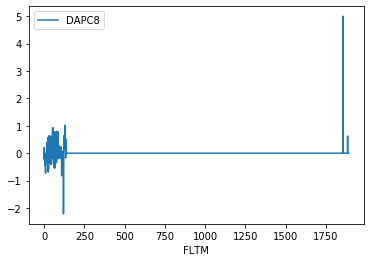

In [97]:
df_t.plot(x='FLTM',y='DAPC8')

In [1]:
from sklearn.ensemble import IsolationForest

In [27]:
to_model_columns=df.columns[1:]
to_model_columns

Index(['DAPC1', 'DAPC2', 'DAPC3', 'DAPC4', 'DAPC5', 'DAPC6', 'DAPC7', 'DAPC8'], dtype='object')

In [28]:
clf=IsolationForest(n_estimators=100,max_samples='auto',max_features=1.0,bootstrap=False,n_jobs=-1,random_state=42,verbose=0)


In [29]:
clf.fit(df[to_model_columns])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [61]:
pred=clf.predict(df[to_model_columns])

In [31]:
df['anomaly']=pred

In [33]:
outliers=df.iloc[df['anomaly']==-1]

In [37]:
outlier_index=list(outliers.index)


In [35]:
print(df['anomaly'].value_counts())

 1    48070
-1     3102
Name: anomaly, dtype: int64


In [67]:
df[df['anomaly']==-1]

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8,anomaly
index,,,,,,,,,,
326,6.50,0.00000,0.00000,0.0,0.0,0.16479,-0.10895,0.09979,-0.15564,-1
327,6.52,0.00000,0.00000,0.0,0.0,0.18097,-0.11047,0.10162,-0.17181,-1
328,6.54,0.00000,0.00000,0.0,0.0,0.19928,-0.11322,0.10437,-0.19043,-1
329,6.56,0.00000,0.00000,0.0,0.0,0.21912,-0.11627,0.10773,-0.21027,-1
330,6.58,0.00000,0.00000,0.0,0.0,0.23682,-0.11932,0.11078,-0.22827,-1
...,...,...,...,...,...,...,...,...,...,...
16860,337.18,-2.21527,1.28082,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1
16861,337.20,-2.18964,1.26251,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1
16862,337.22,-2.16370,1.24390,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1


In [59]:
clf.fit(df1[to_model_columns])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [62]:
pred1=clf.predict(df1[to_model_columns])

In [63]:
df1['anomaly']=pred1

In [64]:
outliers1=df1.iloc[df1['anomaly']==-1]

In [65]:
outlier_index1=list(outliers1.index)

In [66]:
print(df1['anomaly'].value_counts())

 1    48263
-1     2909
Name: anomaly, dtype: int64


In [68]:
df1[df1['anomaly']==-1]

,FLTM,DAPC1,DAPC2,DAPC3,DAPC4,DAPC5,DAPC6,DAPC7,DAPC8,anomaly
index,,,,,,,,,,
325,6.50,0.00000,0.00000,0.0,0.0,0.16479,-0.10895,0.09979,-0.15564,-1
326,6.52,0.00000,0.00000,0.0,0.0,0.18097,-0.11047,0.10162,-0.17181,-1
327,6.54,0.00000,0.00000,0.0,0.0,0.19928,-0.11322,0.10437,-0.19043,-1
328,6.56,0.00000,0.00000,0.0,0.0,0.21912,-0.11627,0.10773,-0.21027,-1
329,6.58,0.00000,0.00000,0.0,0.0,0.23682,-0.11932,0.11078,-0.22827,-1
...,...,...,...,...,...,...,...,...,...,...
16859,337.18,-2.21527,1.28113,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1
16860,337.20,-2.18964,1.26251,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1
16861,337.22,-2.16400,1.24390,0.0,0.0,0.00000,0.00000,0.00000,0.00000,-1
